In [1]:
import sys
sys.executable

'C:\\Users\\SEAN\\anaconda3\\envs\\Carbon_Cloud\\python.exe'

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Creating a dataframe
transport_df = pd.read_csv("Transportation_Preprocessed_Grouped_Dataset.csv")
transport_df.head(50)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_comb,co2_emissions
0,ACURA,ILX,cluster0,2.0,4,AS,Z,8.5,196
1,ACURA,ILX,cluster0,2.4,4,M,Z,9.6,221
2,ACURA,ILX,cluster0,1.5,4,AV,Z,5.9,136
3,ACURA,MDX,cluster3,3.5,6,AS,Z,11.1,255
4,ACURA,RDX,cluster3,3.5,6,AS,Z,10.6,244
5,ACURA,RLX,cluster0,3.5,6,AS,Z,10.0,230
6,ACURA,TL,cluster0,3.5,6,AS,Z,10.1,232
7,ACURA,TL,cluster0,3.7,6,AS,Z,11.1,255
8,ACURA,TL,cluster0,3.7,6,M,Z,11.6,267
9,ACURA,TSX,cluster0,2.4,4,AS,Z,9.2,212


In [4]:
transport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7384 entries, 0 to 7383
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   make                   7384 non-null   object 
 1   model                  7384 non-null   object 
 2   vehicle_class          7384 non-null   object 
 3   engine_size            7384 non-null   float64
 4   cylinders              7384 non-null   int64  
 5   transmission           7384 non-null   object 
 6   fuel_type              7384 non-null   object 
 7   fuel_consumption_comb  7384 non-null   float64
 8   co2_emissions          7384 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 519.3+ KB


In [5]:
# Qualitative / Categorical Variables :- make, model, vehicle_class, transmission, fuel_type
transport_df_qualitative = transport_df.drop(['engine_size','cylinders','fuel_consumption_comb','co2_emissions'], axis=1)

In [6]:
# Visualizing unique_categories_count & Observations/sample_count for each categories related to all Qualitative Variables
for i in transport_df_qualitative.columns:
    category_count = transport_df[i].value_counts()
    print(category_count)
    print("Unique categories count for", i ,":",transport_df[i].nunique())
    print()

make
FORD             628
CHEVROLET        587
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: count, dtype: int64
Unique categories count for make : 42

model
I series       230
COOPER         204
F-15

In [7]:
# # Encoding technique that should be use for each Categorical Variables are listed below
# make (42 categories) => Hash Encoding
# model (351 categories) => Hash Encoding
# vehicle_class (7 categories) => Dummy Encoding
# transmission (5 categories) => Dummy Encoding
# fuel_type (4 categories) => Dummy Encoding

In [8]:
# # Encoding categorical variable "make" using Hash Encoding.

# import category_encoders as ce

# # Initialize HashingEncoder
# hash_encoder = ce.HashingEncoder(cols=['make'], n_components=4)  # Adjust n_components as needed

# # Fit and transform the data
# hash_encoded = hash_encoder.fit_transform(transport_df['make'])

# # Get the names of the resulting columns
# column_names = hash_encoder.get_feature_names_out()

# # Concatenate original column name with the resulting column names
# hash_encoded.columns = [f"{transport_df.columns[0]}_{col}" for col in column_names]

# # Concatenate original DataFrame with hash-encoded DataFrame
# transport_df = pd.concat([transport_df, hash_encoded], axis=1)
# transport_df

In [9]:
# # Encoding categorical variable "model" using Hash Encoding.

# import category_encoders as ce

# # Initialize HashingEncoder
# hash_encoder = ce.HashingEncoder(cols=['model'], n_components=4)  # Adjust n_components as needed

# # Fit and transform the data
# hash_encoded = hash_encoder.fit_transform(transport_df['model'])

# # Get the names of the resulting columns
# column_names = hash_encoder.get_feature_names_out()

# # Concatenate original column name with the resulting column names
# hash_encoded.columns = [f"{transport_df.columns[1]}_{col}" for col in column_names]

# # Concatenate original DataFrame with hash-encoded DataFrame
# transport_df = pd.concat([transport_df, hash_encoded], axis=1)
# transport_df

In [10]:
# # Encoding categorical variable "make" using Frequency Encoding.

# Calculate frequencies of each category
frequency_map = transport_df['make'].value_counts(normalize=True)

# Replace categories with their frequencies
transport_df['make'] = transport_df['make'].map(frequency_map)
transport_df

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_comb,co2_emissions
0,0.009751,ILX,cluster0,2.0,4,AS,Z,8.5,196
1,0.009751,ILX,cluster0,2.4,4,M,Z,9.6,221
2,0.009751,ILX,cluster0,1.5,4,AV,Z,5.9,136
3,0.009751,MDX,cluster3,3.5,6,AS,Z,11.1,255
4,0.009751,RDX,cluster3,3.5,6,AS,Z,10.6,244
...,...,...,...,...,...,...,...,...,...
7379,0.016793,XC40,cluster3,2.0,4,AS,Z,9.4,219
7380,0.016793,XC60,cluster3,2.0,4,AS,Z,9.9,232
7381,0.016793,XC60,cluster3,2.0,4,AS,Z,10.3,240
7382,0.016793,XC90,cluster6,2.0,4,AS,Z,9.9,232


In [11]:
# # Encoding categorical variable "model" using Frequency Encoding.

# Calculate frequencies of each category
frequency_map = transport_df['model'].value_counts(normalize=True)

# Replace categories with their frequencies
transport_df['model'] = transport_df['model'].map(frequency_map)
transport_df

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_comb,co2_emissions
0,0.009751,0.001490,cluster0,2.0,4,AS,Z,8.5,196
1,0.009751,0.001490,cluster0,2.4,4,M,Z,9.6,221
2,0.009751,0.001490,cluster0,1.5,4,AV,Z,5.9,136
3,0.009751,0.002167,cluster3,3.5,6,AS,Z,11.1,255
4,0.009751,0.001219,cluster3,3.5,6,AS,Z,10.6,244
...,...,...,...,...,...,...,...,...,...
7379,0.016793,0.000406,cluster3,2.0,4,AS,Z,9.4,219
7380,0.016793,0.002979,cluster3,2.0,4,AS,Z,9.9,232
7381,0.016793,0.002979,cluster3,2.0,4,AS,Z,10.3,240
7382,0.016793,0.001761,cluster6,2.0,4,AS,Z,9.9,232


In [12]:
# from category_encoders import TargetEncoder

# # Assuming 'data' is your DataFrame containing the dataset
# # 'make' and 'model' are categorical variables, and 'co2_emission' is the target variable

# # Define categorical variables
# categorical_cols = ['make','model']

# # Initialize target encoder
# encoder = TargetEncoder()

# # Fit target encoder on the categorical variables
# encoded_data = transport_df.copy()  # Create a copy of the original DataFrame to preserve the original data
# transport_df[categorical_cols] = encoder.fit_transform(transport_df[categorical_cols], transport_df['co2_emissions'])
# transport_df

In [13]:
# Encoding categorical variables "vehicle_class" using Dummy Encoding.
dummy_encoded_vehicle_class = pd.get_dummies(transport_df['vehicle_class'], drop_first=True, prefix='vehicle_class')
# Convert "True / False" to "1 / 0"
dummy_encoded_vehicle_class = dummy_encoded_vehicle_class.astype(int)
# Concatenate original DataFrame with vehicle_class dummy-encoded DataFrame
transport_df = pd.concat([transport_df, dummy_encoded_vehicle_class], axis=1)

# Encoding categorical variables "transmission" using Dummy Encoding.
dummy_encoded_transmission = pd.get_dummies(transport_df['transmission'], drop_first=True, prefix='transmission')
# Convert "True / False" to "1 / 0"
dummy_encoded_transmission = dummy_encoded_transmission.astype(int)
# Concatenate original DataFrame with transmission dummy-encoded DataFrame
transport_df = pd.concat([transport_df, dummy_encoded_transmission], axis=1)

# Encoding categorical variables "fuel_type"  using Dummy Encoding.
dummy_encoded_fuel_type = pd.get_dummies(transport_df['fuel_type'], drop_first=True, prefix='fuel_type')
# Convert "True / False" to "1 / 0"
dummy_encoded_fuel_type = dummy_encoded_fuel_type.astype(int)
# Concatenate original DataFrame with transmission dummy-encoded DataFrame
transport_df = pd.concat([transport_df, dummy_encoded_fuel_type], axis=1)

In [14]:
# Removing the original categorical variable from the dataframe. "make", "vehicle_class", "transmission", "fuel_type"
transport_df = transport_df.drop(['vehicle_class', "transmission", 'fuel_type'], axis=1)
transport_df

,make,model,engine_size,cylinders,fuel_consumption_comb,co2_emissions,vehicle_class_cluster1,vehicle_class_cluster2,vehicle_class_cluster3,vehicle_class_cluster4,vehicle_class_cluster5,vehicle_class_cluster6,transmission_AM,transmission_AS,transmission_AV,transmission_M,fuel_type_E,fuel_type_X,fuel_type_Z
0,0.009751,0.001490,2.0,4,8.5,196,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0.009751,0.001490,2.4,4,9.6,221,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0.009751,0.001490,1.5,4,5.9,136,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.009751,0.002167,3.5,6,11.1,255,0,0,1,0,0,0,0,1,0,0,0,0,1
4,0.009751,0.001219,3.5,6,10.6,244,0,0,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7379,0.016793,0.000406,2.0,4,9.4,219,0,0,1,0,0,0,0,1,0,0,0,0,1
7380,0.016793,0.002979,2.0,4,9.9,232,0,0,1,0,0,0,0,1,0,0,0,0,1
7381,0.016793,0.002979,2.0,4,10.3,240,0,0,1,0,0,0,0,1,0,0,0,0,1
7382,0.016793,0.001761,2.0,4,9.9,232,0,0,0,0,0,1,0,1,0,0,0,0,1


In [15]:
# Column to be moved to the last position
column_to_move = 'co2_emissions'

# Pop the column from its original position and insert it at the last position
column = transport_df.pop(column_to_move)
transport_df.insert(len(transport_df.columns), column.name, column)
transport_df

,make,model,engine_size,cylinders,fuel_consumption_comb,vehicle_class_cluster1,vehicle_class_cluster2,vehicle_class_cluster3,vehicle_class_cluster4,vehicle_class_cluster5,vehicle_class_cluster6,transmission_AM,transmission_AS,transmission_AV,transmission_M,fuel_type_E,fuel_type_X,fuel_type_Z,co2_emissions
0,0.009751,0.001490,2.0,4,8.5,0,0,0,0,0,0,0,1,0,0,0,0,1,196
1,0.009751,0.001490,2.4,4,9.6,0,0,0,0,0,0,0,0,0,1,0,0,1,221
2,0.009751,0.001490,1.5,4,5.9,0,0,0,0,0,0,0,0,1,0,0,0,1,136
3,0.009751,0.002167,3.5,6,11.1,0,0,1,0,0,0,0,1,0,0,0,0,1,255
4,0.009751,0.001219,3.5,6,10.6,0,0,1,0,0,0,0,1,0,0,0,0,1,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7379,0.016793,0.000406,2.0,4,9.4,0,0,1,0,0,0,0,1,0,0,0,0,1,219
7380,0.016793,0.002979,2.0,4,9.9,0,0,1,0,0,0,0,1,0,0,0,0,1,232
7381,0.016793,0.002979,2.0,4,10.3,0,0,1,0,0,0,0,1,0,0,0,0,1,240
7382,0.016793,0.001761,2.0,4,9.9,0,0,0,0,0,1,0,1,0,0,0,0,1,232


In [16]:
# from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import StandardScaler

# # Select the columns you want to normalize
# columns_to_normalize = ['engine_size', 'cylinders', 'fuel_consumption_comb']

# # Extract the selected columns
# data_to_normalize = transport_df[columns_to_normalize]

# # Create an instance of RobustScaler
# scaler = RobustScaler()
# # scaler = StandardScaler()

# # Fit the scaler to the selected columns and transform the data
# normalized_data = scaler.fit_transform(data_to_normalize)

# # Replace the original columns with the normalized values
# transport_df[columns_to_normalize] = normalized_data
# transport_df

In [17]:
transport_df.columns

Index(['make', 'model', 'engine_size', 'cylinders', 'fuel_consumption_comb',
       'vehicle_class_cluster1', 'vehicle_class_cluster2',
       'vehicle_class_cluster3', 'vehicle_class_cluster4',
       'vehicle_class_cluster5', 'vehicle_class_cluster6', 'transmission_AM',
       'transmission_AS', 'transmission_AV', 'transmission_M', 'fuel_type_E',
       'fuel_type_X', 'fuel_type_Z', 'co2_emissions'],
      dtype='object')

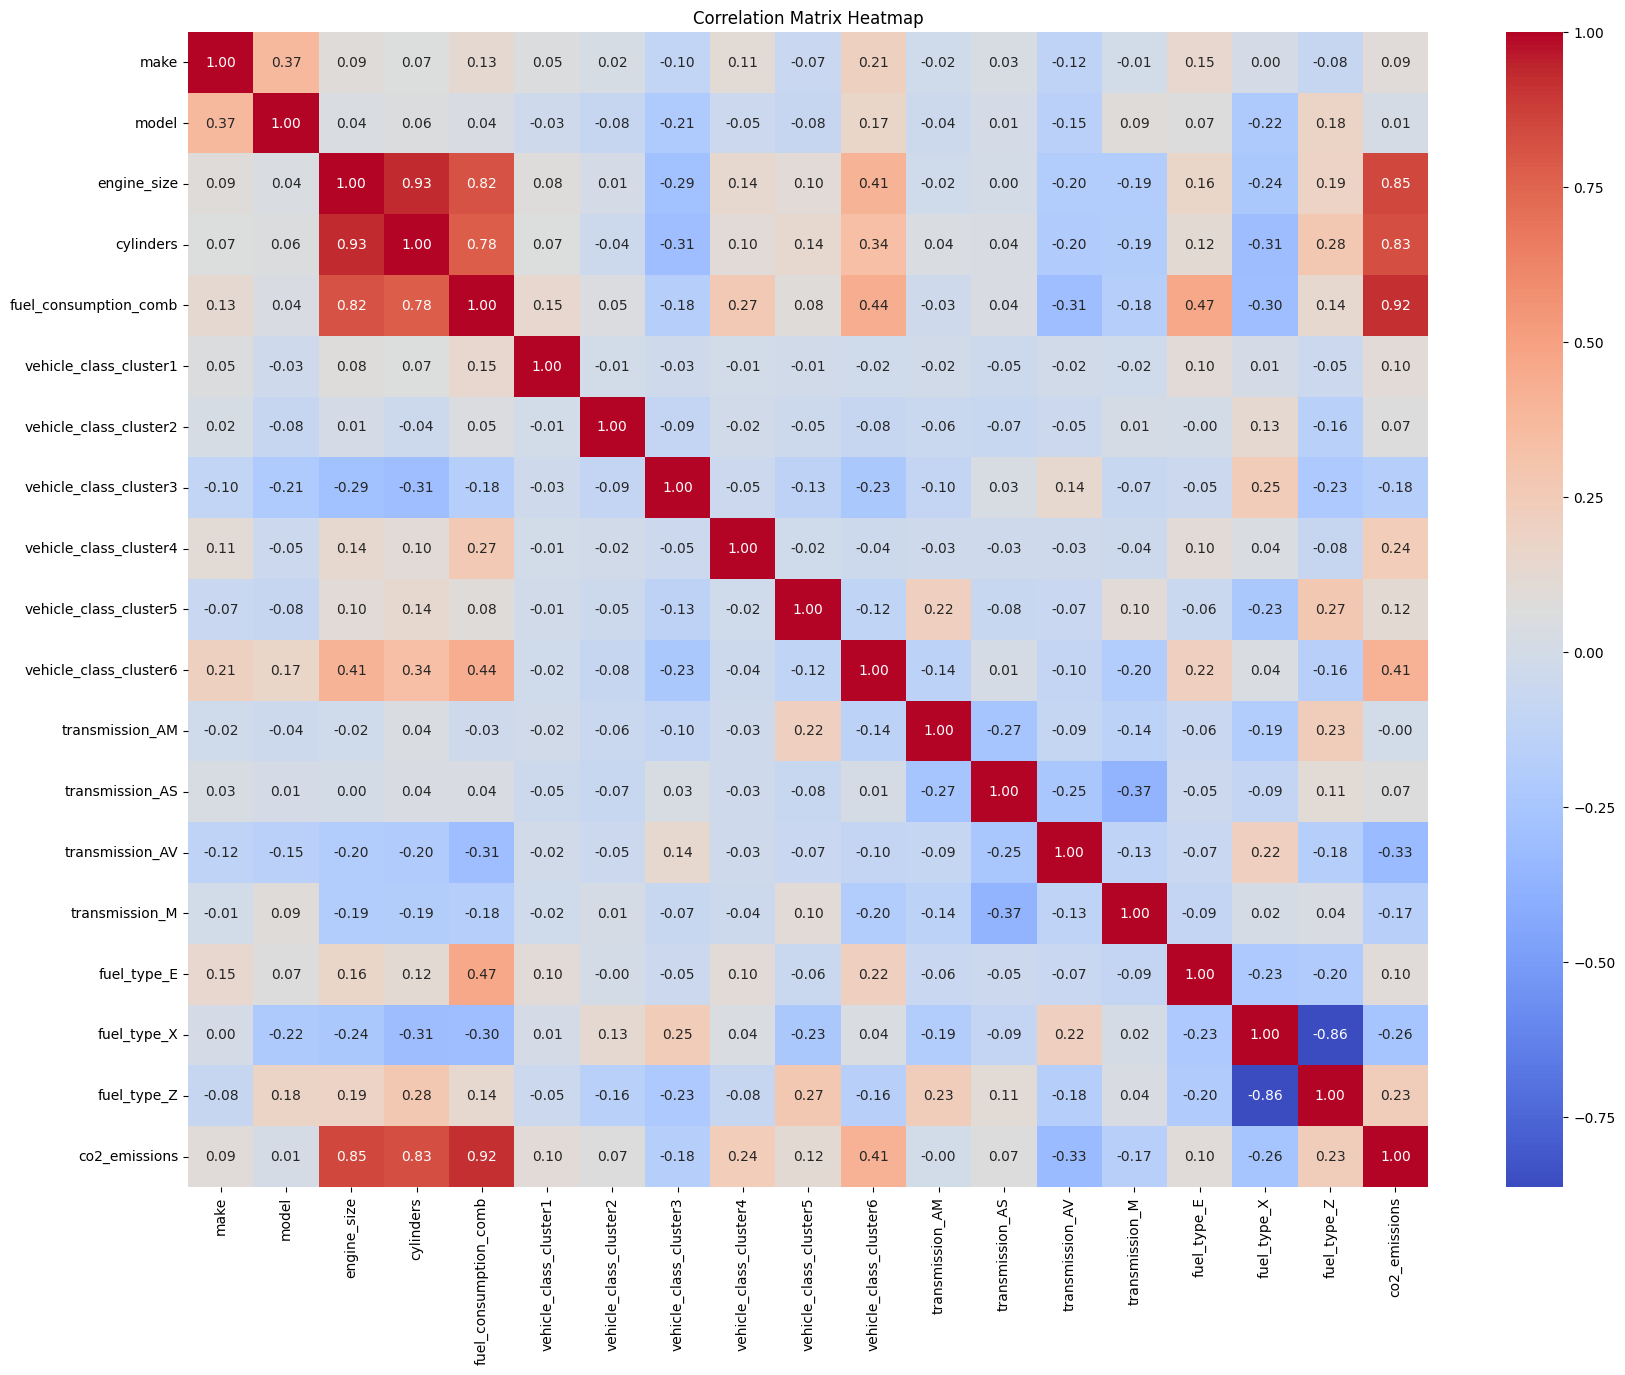

In [18]:
# Calculating the correlation matrix
corr_matrix = transport_df.corr()

# Ploting the HEATMAP
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
# sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [19]:
# Writing the Encoded transport_df to a CSV file
transport_df.to_csv('Transportation_Hash_Dummy_Encoded_Dataset.csv', index=False)